<a id='top'></a>
# Project 2018 - Fundamentals Of Data Analysis

### A Notebook by : Marco Men

### Last Commit by : 14 - 12 - 2018

## Table Of Contents

<a href ='#intro'> Introduction</a><br>
<a href='#histo'> History Of Boxplots</a><br>
<a href='#sex'> Analysis Of Data By Gender</a><br>
<a href='#smoke'> Smokers vs. non-smokers</a><br>
<a href='#day'> Days of the Week </a><br>
<a href ='#lit'> Literature Review </a><br>

## <a id ='intro'>Introduction</a>

I was asked to investigate and explain box plots and their uses. I will be using matplotlib.pyplot to create boxplots in this notebook.
I will also be:

* Summarising the history of the box plots and situations in which they are used ;
* Demonstrating the use of the box plot using data of my choosing;
* Explain any relevant terminology such as the terms quartile and percentile;
* Compare the box plot alternatives.

## <a id='histo'>History of Box Plots</a>

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
http://onlinestatbook.com/2/graphing_distributions/boxplots.html
https://stattrek.com/statistics/dictionary.aspx?definition=boxplot
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/descriptive-statistics/box-plot/
https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/interquartile-range-and-boxplots-2-of-3/

I will be using 'Tips' from seaborn to demonstrate the boxplots. This dataset is quite good and it provides 7 different variables.
Usually a boxplot is used when a discrete variable ( Female or Male ) is plotted against a continuous variable .

In [2]:
# Libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the DS
# Adapted from : 'https://seaborn.pydata.org/introduction.html'

tips = sns.load_dataset("tips")

tips


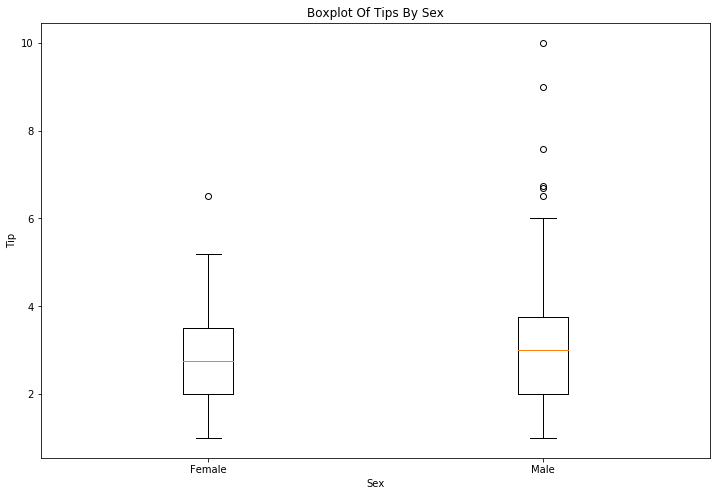

In [3]:
boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['sex']== 'Female']['tip'],
    tips[tips['sex']== 'Male']['tip']],
 
    labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Sex')

boxplot.show()

##  <a id='sex'>Analysis Of Data By Gender</a>

In this example it is evident that men are better at tipping after having a meal. Perhaps, due to lower expectations with regards to service, or the fact that men are more likely to go out more often. Even, if a couple goes out for dinner, there is a bigger chance that men will pay for the dinner.
There are also more outliers ( 6 outliers ) on the male boxplot ( male dinners that tip outside the \$6 mark - maximum tip for male dinners ). The furthest male outlier reaches a tip payment level of \$10.
For the female boxplot, the maximum tip is in the mark of \$5.50, with only 1 outlier paying \$6.50.

With this dataset, I could further investigate which day of the week ( between Thursday, Friday, Saturday and Sunday ) the people are more likely to tip better or worse. Or, which are the biggest tippers between smokers and non-smokers.
All of these can be done using boxplots ( also referred to as whisker plots )

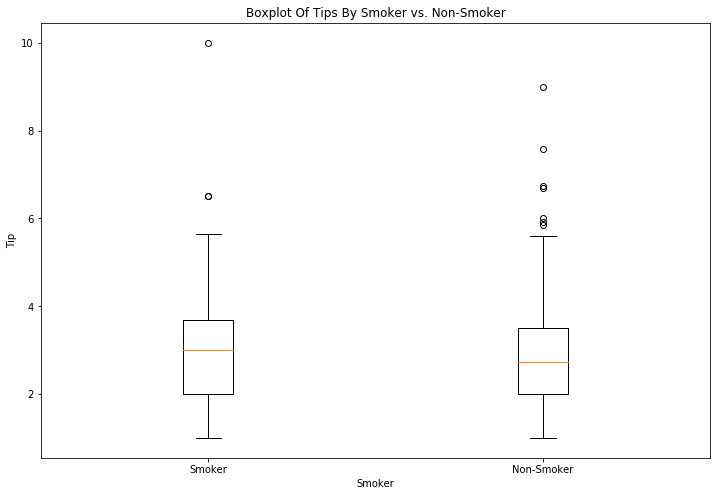

In [4]:
# Smokers vs. Non-smokers

boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['smoker']== 'Yes']['tip'],
    tips[tips['smoker']== 'No']['tip']],
 
    labels=['Smoker', 'Non-Smoker'])

axes1.set_xlabel('Smoker')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Smoker vs. Non-Smoker')

boxplot.show()

## <a id= 'smoke'> Analysis of 'Smoker vs. Non-Smoker Tips' </a>

Through visualising the boxplots above, the conclusion that there is little difference between the 2 groups in terms of providing tips. There are more non-smoker outliers,i.e.more non-smoker customers giving tips outside the maximum value of \$5.85(approx.). But the customer that gives the highest tip (\$10) is a smoker. This pushes the mean line in the boxplot closer to the 3th quartile.

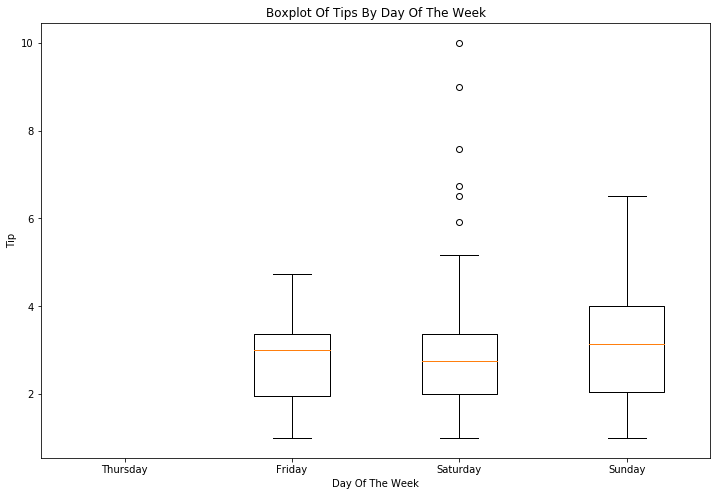

In [9]:
# Days of the week

boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['day']== 'Thu']['tip'],
    tips[tips['day']== 'Fri']['tip'],
     tips[tips['day']=='Sat']['tip'],
     tips[tips['day']=='Sun']['tip']],
    
 
    labels=['Thursday', 'Friday', 'Saturday', 'Sunday'])

axes1.set_xlabel('Day Of The Week')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Day Of The Week')

boxplot.show()

## <a id='day'>Day Of The Week Analysis</a>

The day of the week with higher tips is Sunday

In [10]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

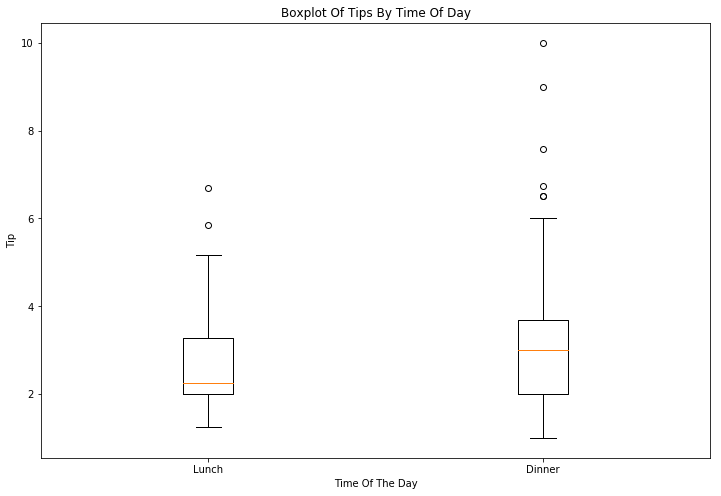

In [6]:
# Time(Dinner or lunch)

boxplot = plt.figure(figsize=(12,8))
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(

    [tips[tips['time']== 'Lunch']['tip'],
    tips[tips['time']== 'Dinner']['tip']],
 
    labels=['Lunch', 'Dinner'])

axes1.set_xlabel('Time Of The Day')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot Of Tips By Time Of Day')

boxplot.show()

## <a id='lit'>Literature Review</a>

'Pandas For Everyone' - Daniel Y. Chen

<a href='#top'>Back To Top</a>